# Lab 1: Introduction to Time-Series Analysis with R

### Required packages
Make sure R version is 3 or higher

In [2]:
library("astsa")
library("fpp")

In [3]:
# J&J Quarterly Earnings per Share
data(jj)
jj

,Qtr1,Qtr2,Qtr3,Qtr4
1960,0.710000,0.630000,0.850000,0.440000
1961,0.610000,0.690000,0.920000,0.550000
1962,0.720000,0.770000,0.920000,0.600000
1963,0.830000,0.800000,1.000000,0.770000
1964,0.920000,1.000000,1.240000,1.000000
1965,1.160000,1.300000,1.450000,1.250000
1966,1.260000,1.380000,1.860000,1.560000
1967,1.530000,1.590000,1.830000,1.860000
1968,1.530000,2.070000,2.340000,2.250000
1969,2.160000,2.430000,2.700000,2.250000


In [4]:
# Converting the data to a matrix
jjm = as.matrix(jj)
dim(jjm)

[1] 84  1

In [5]:
# Making a monthly time series object starting in June 2014
options(digits=2)
zardoz <- ts(rnorm(48), start=c(2014,6), frequency=12)

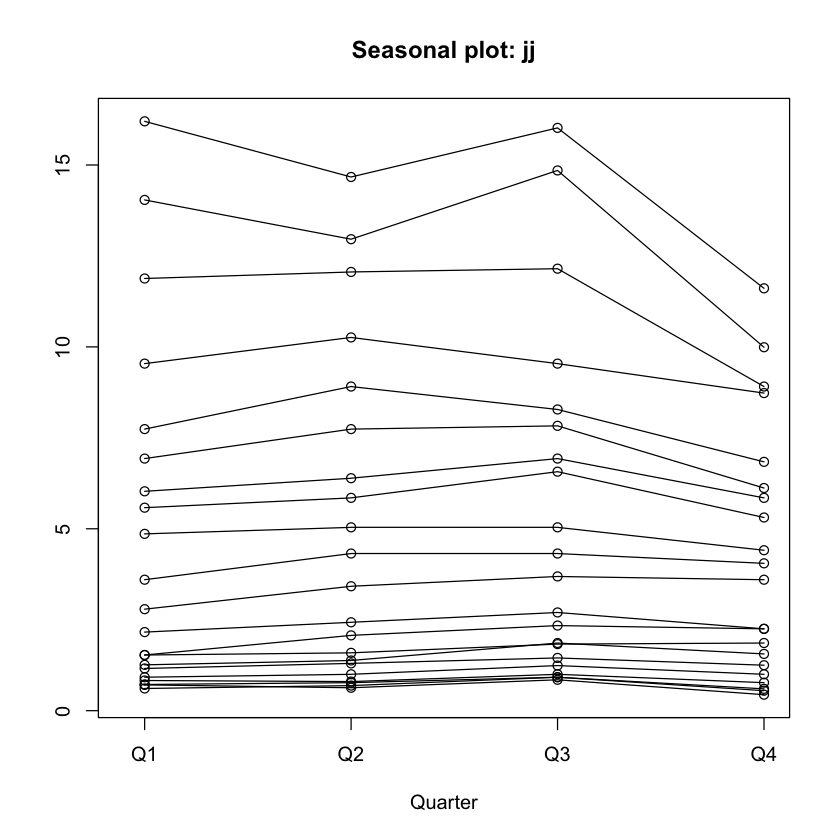

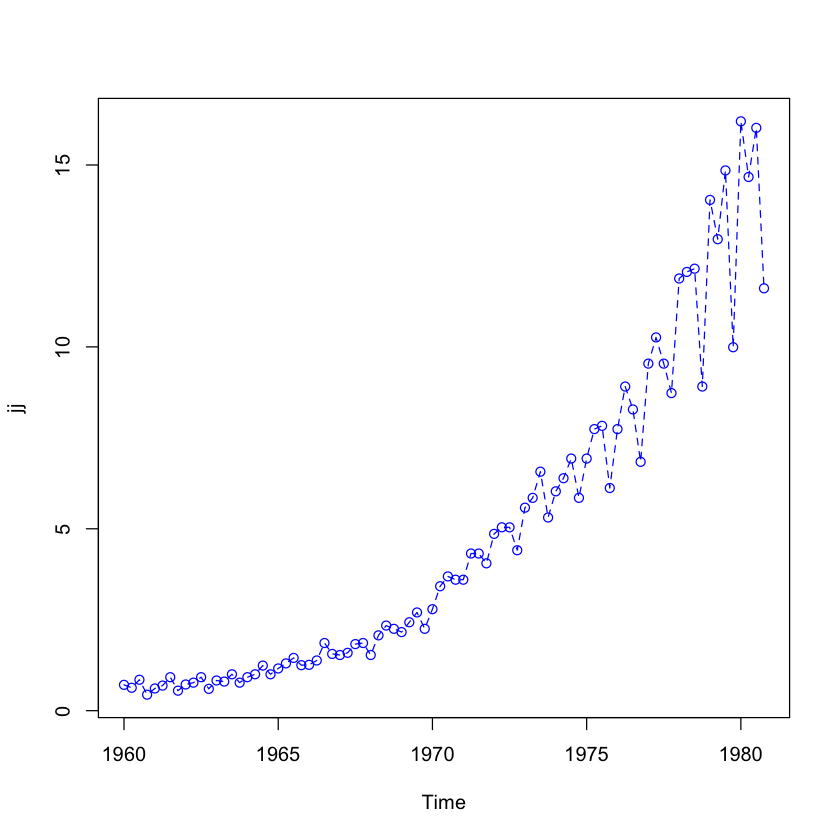

In [6]:
# Plotting the data
seasonplot(jj)
plot(jj, type="o", col="blue", lty="dashed")

## Global Temperature Deviations

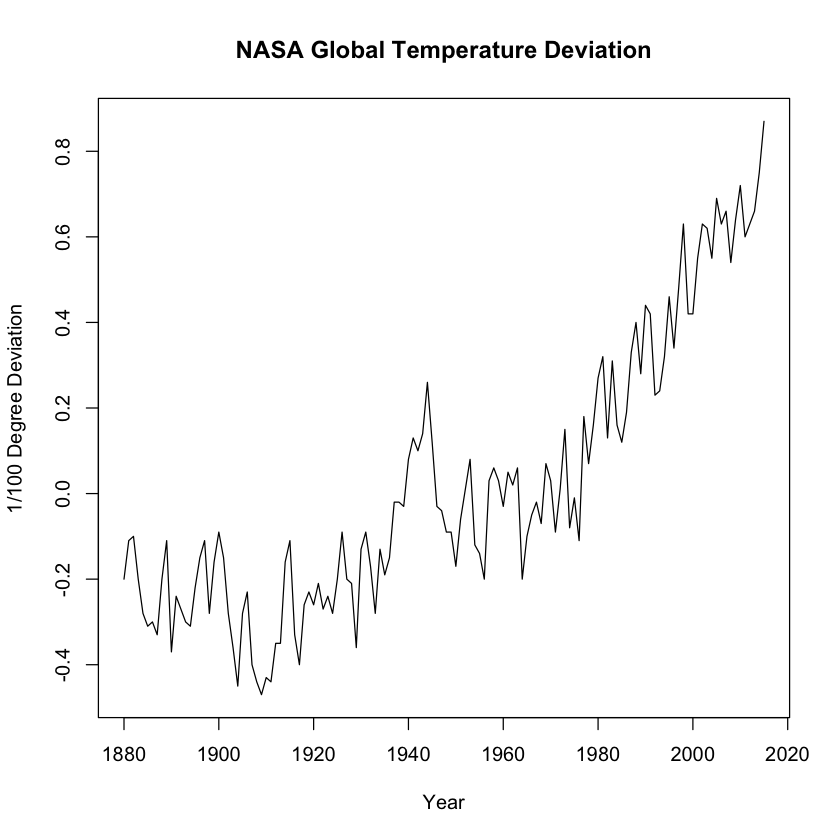

In [7]:
# Working with global temperature deviations
temp <- globtemp
time <- 1880 + (1:length(temp)-1)
plot(time, temp, type="l", main="NASA Global Temperature Deviation", xlab="Year", ylab="1/100 Degree Deviation")

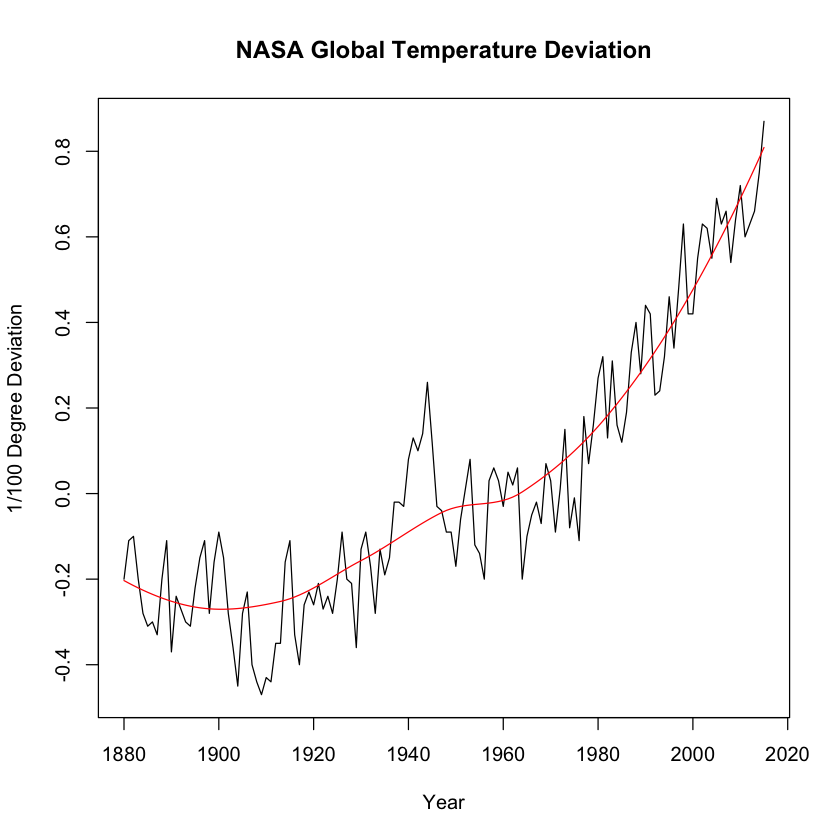

In [8]:
# Smoothing the series with loess
smth <- loess(temp ~ time)
plot(time, temp, type="l", main="NASA Global Temperature Deviation", xlab="Year", ylab="1/100 Degree Deviation")
lines(time, smth$fitted, col="red")

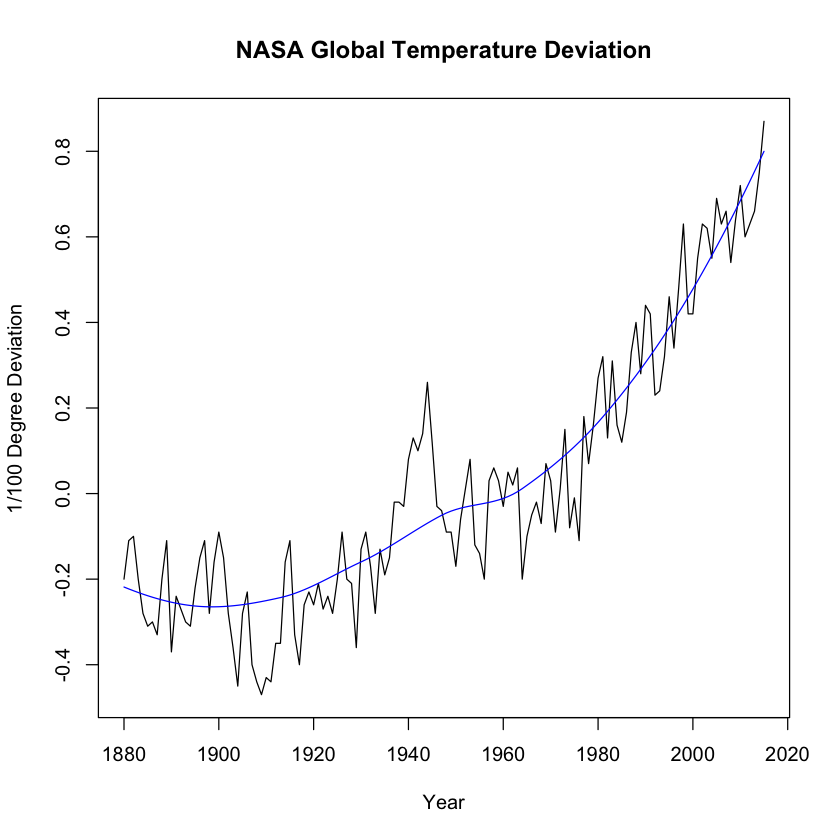

In [9]:
# Trying with a different smoothing parameter
smth2 <- loess(temp ~ time, span=0.8)
plot(time, temp, type="l", main="NASA Global Temperature Deviation", xlab="Year", ylab="1/100 Degree Deviation")
lines(time, smth2$fitted, col="blue")

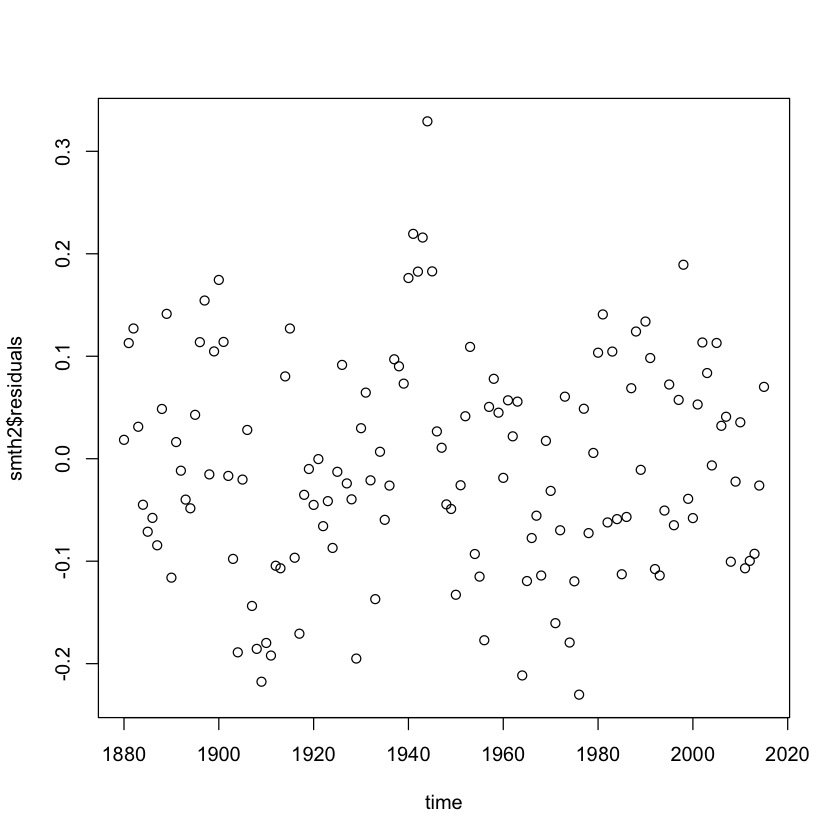

In [10]:
# Checking the residuals
plot(time, smth2$residuals)

## Speech Signal

[1] 1020

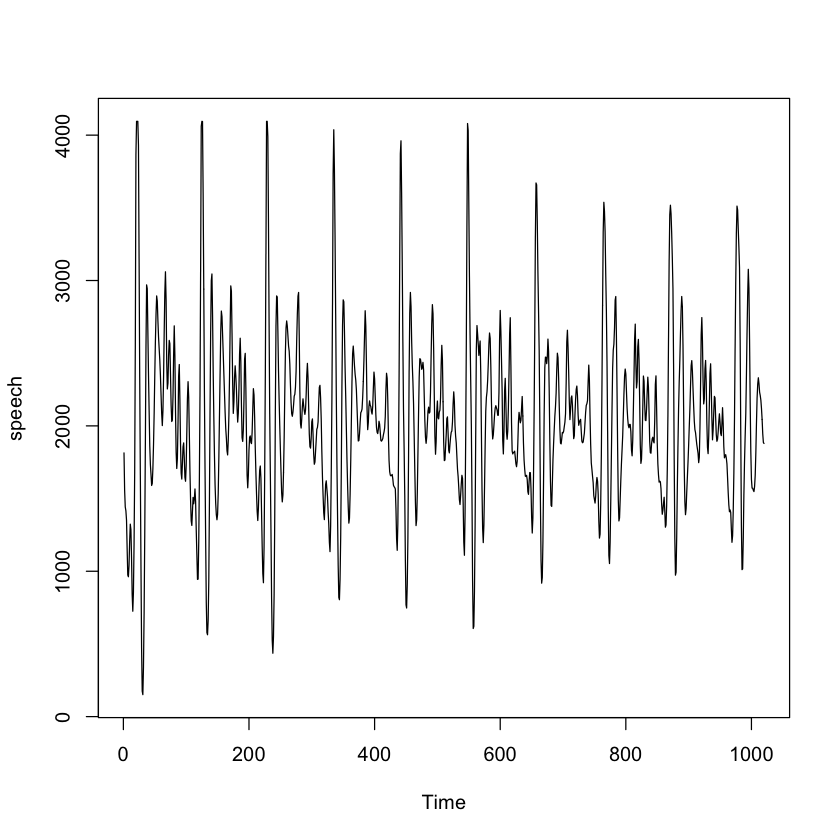

In [11]:
# Exploring a speech signal
length(speech)
plot(speech, type="l")

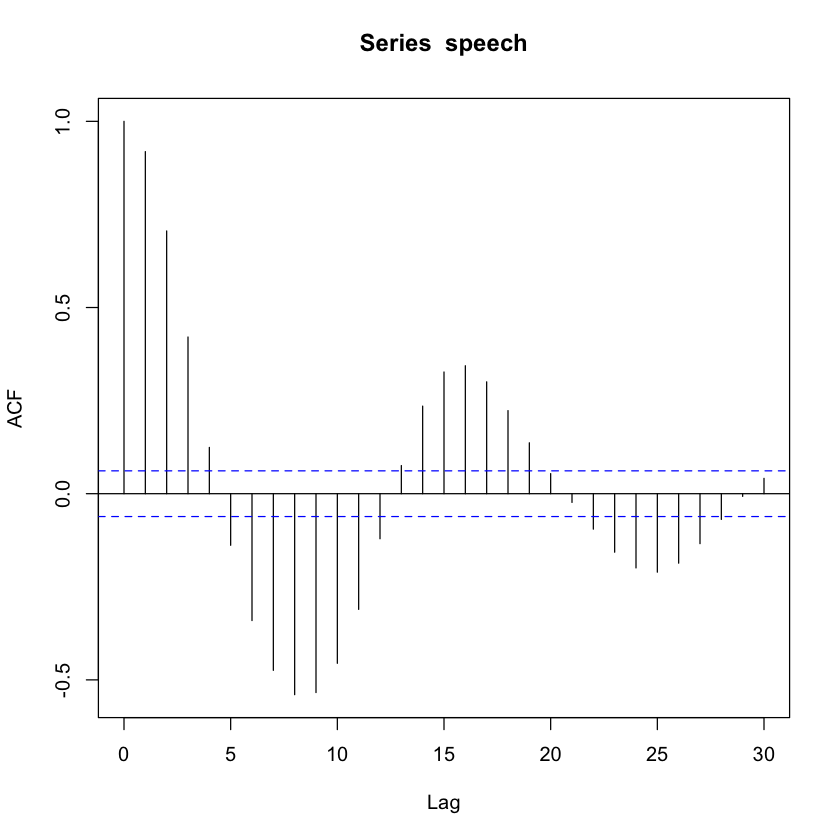

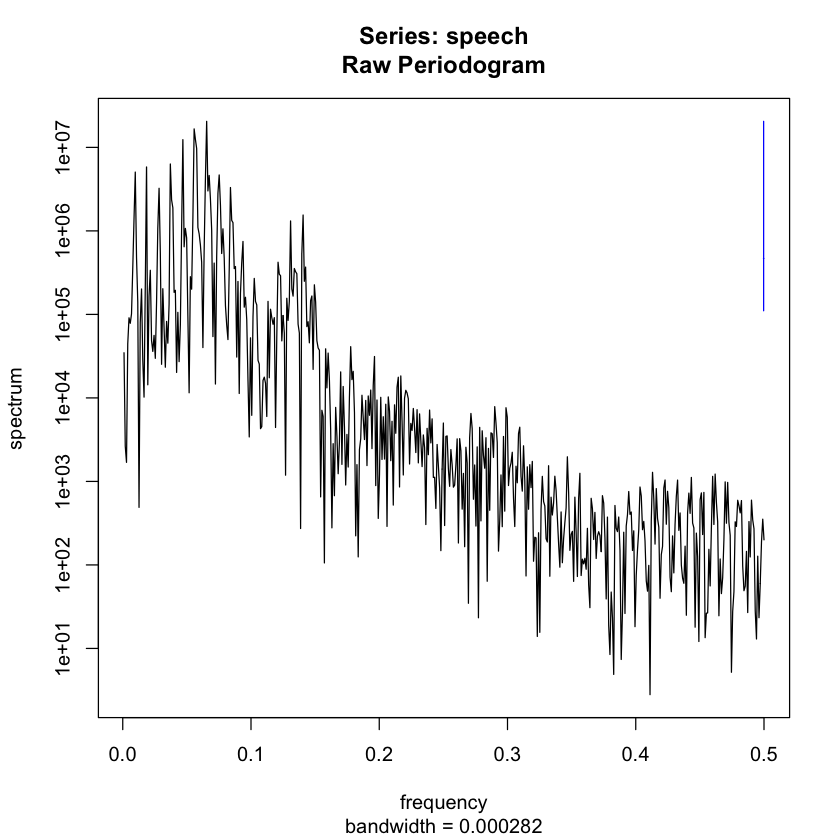

In [12]:
# Examining autocorrelations and periodograms
acf(speech)
pg <- spec.pgram(speech, demean=TRUE)
plot(pg)

## Random Walk


Call:
lm(formula = rw ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
 -3.92  -1.89   0.03   1.85   3.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.87114    0.41988    2.07    0.041 *  
x           -0.15948    0.00722  -22.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.1 on 98 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.831 
F-statistic:  488 on 1 and 98 DF,  p-value: <2e-16


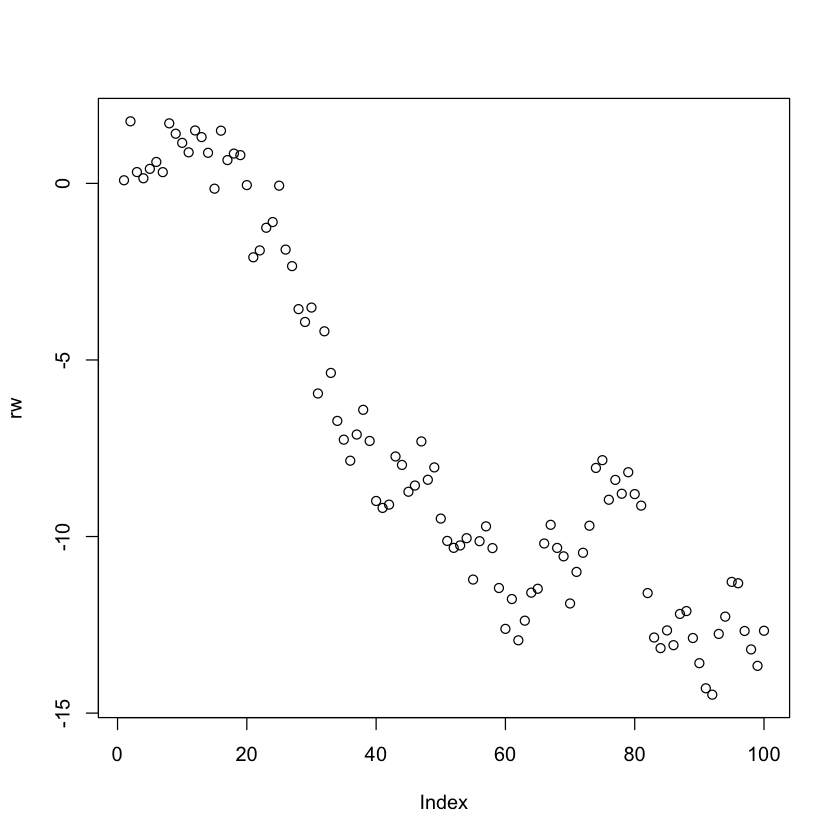

In [13]:
# Constructing a random walk and running a regression
n <- 100
x <- 1:n
rw <- cumsum(rnorm(n))
plot(rw)
reg <- lm(rw ~ x)
summary(reg)

[1] 91

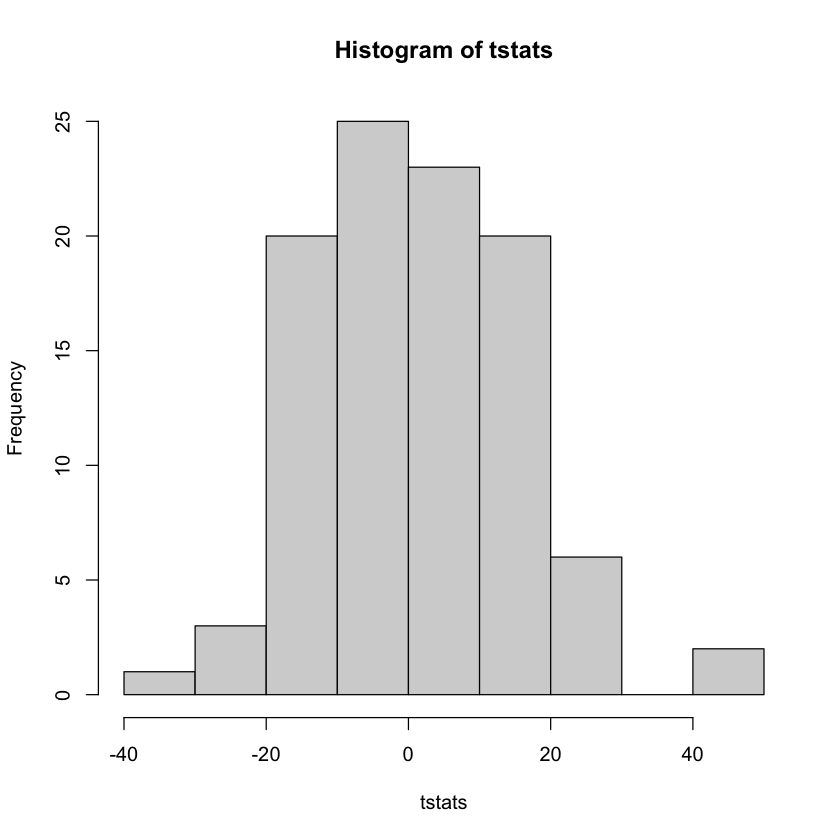

In [14]:
# Simulating t-statistic of the slope and drawing a histogram
nreps <- 100
tstats <- rep(0, nreps)
for(rep in 1:nreps) {
  rw <- cumsum(rnorm(n))
  regr <- lm(rw ~ x)
  tstats[rep] <- coefficients(summary(regr))[2,3]
}
hist(tstats)
sum(abs(tstats)>2)

## Linear and Autoregressive Processes

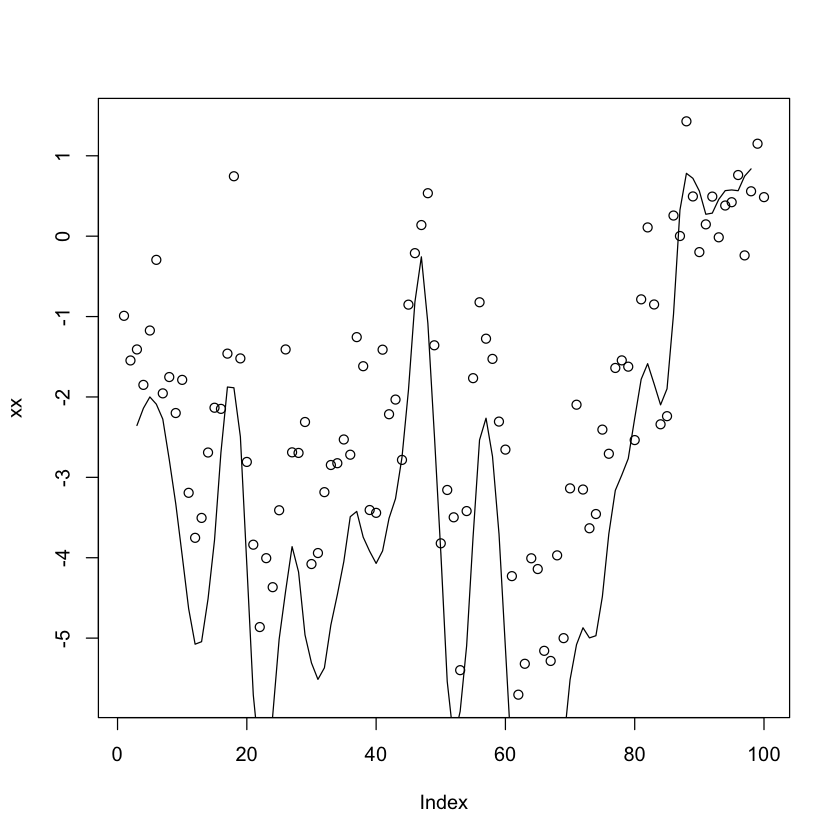

In [15]:
# Linear Process
xx <- cumsum(rnorm(100))
xt <- filter(xx, filter=c(.2,.4,.4,.4,.2), method="convolution")
plot(xx)
lines(xt)

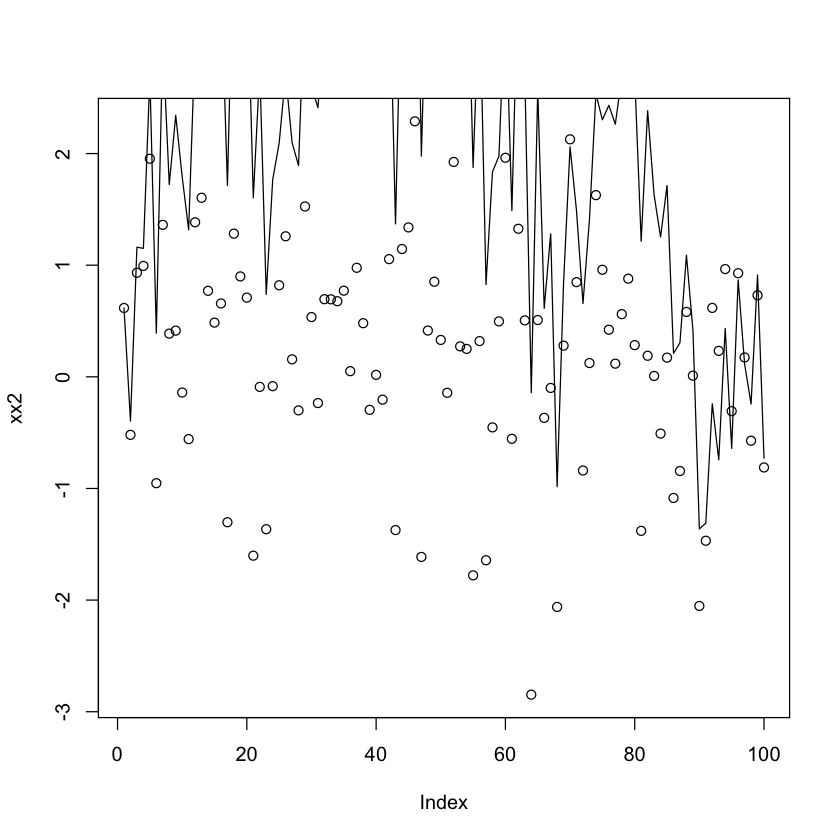

In [16]:
# Autoregression
xx2 = rnorm(100)
xt2 <- filter(xx2, filter=c(.2,.5,.2), method="recursive")
plot(xx2)
lines(xt2)